
#  Assignment: BASIC STATISTICS
###  Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

##  Introduction
**Objective**:  
To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


In [9]:

import pandas as pd

# Load the dataset
file_path = r"C:\Users\prern\OneDrive\Desktop\New folder\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv"
df = pd.read_csv(file_path)
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


##  Descriptive Analytics for Numerical Columns

In [10]:

# Identifying numerical columns
numerical_cols = df.select_dtypes(include='number')

# Calculating basic statistics
descriptive_stats = numerical_cols.describe().T[['mean', 'std']]
descriptive_stats['median'] = numerical_cols.median()
descriptive_stats['mode'] = numerical_cols.mode().iloc[0]
descriptive_stats


,mean,std,median,mode
Volume,5.066667,4.231602,4.000000,3.000000
Avg Price,10453.433333,18079.904840,1450.000000,400.000000
Total Sales Value,33812.835556,50535.074173,5700.000000,24300.000000
Discount Rate (%),15.155242,4.220602,16.577766,5.007822
Discount Amount,3346.499424,4509.902963,988.933733,69.177942
Net Sales Value,30466.336131,46358.656624,4677.788059,326.974801


##  Data Visualization
### Histograms

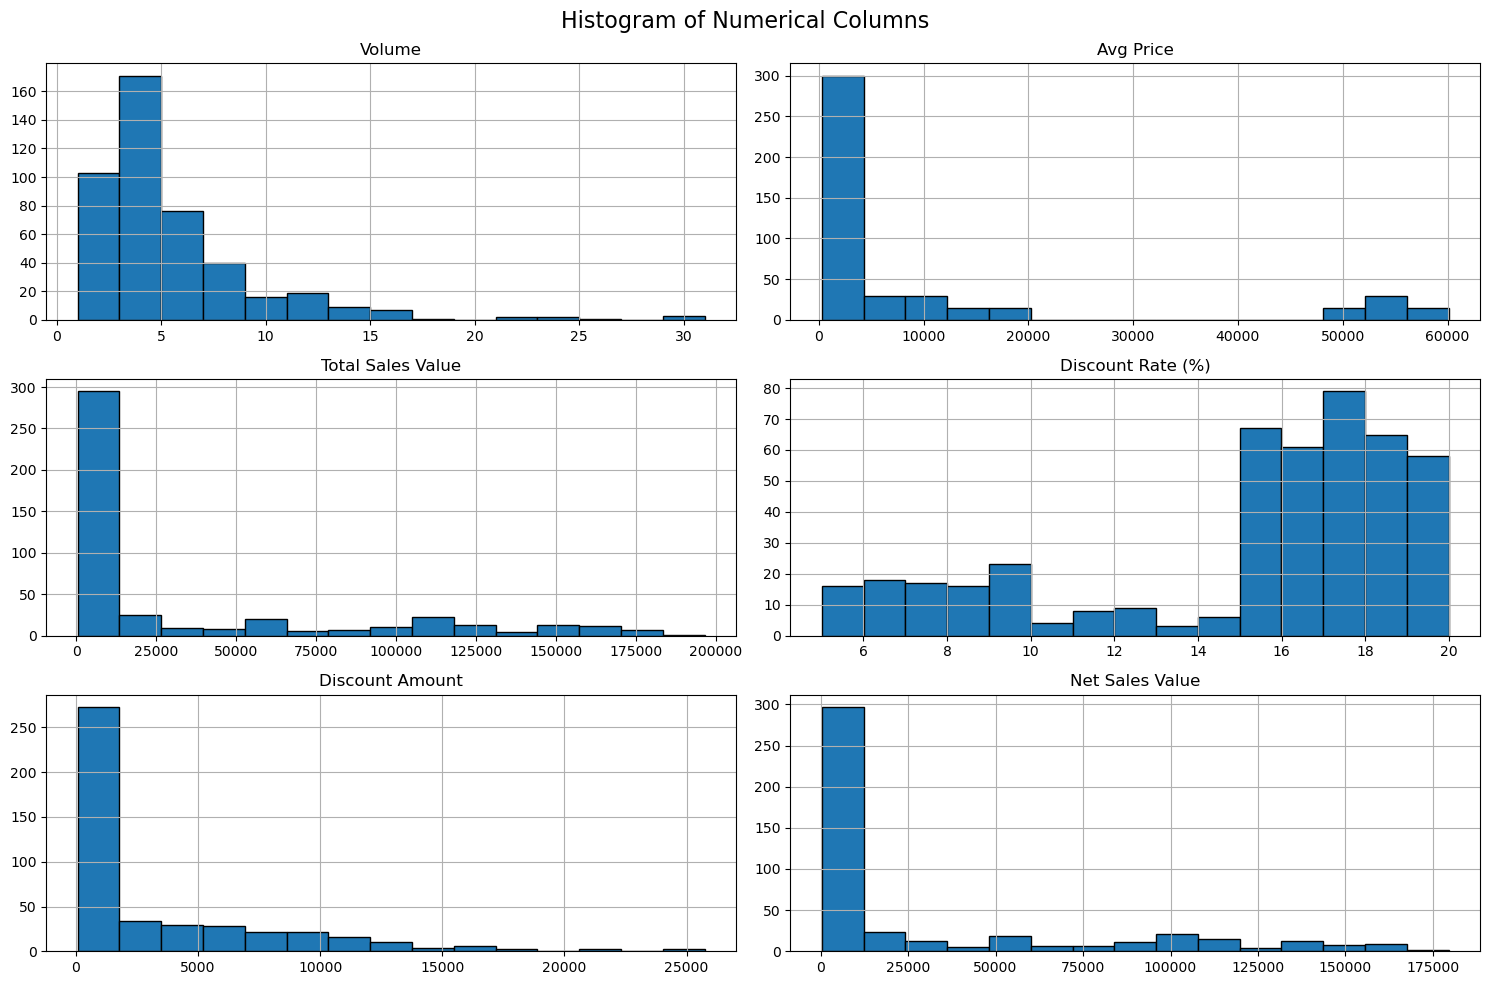

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include='number')

# Plot histograms
numerical_cols.hist(figsize=(15, 10), bins=15, edgecolor='black')
plt.suptitle("Histogram of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()


### Boxplots

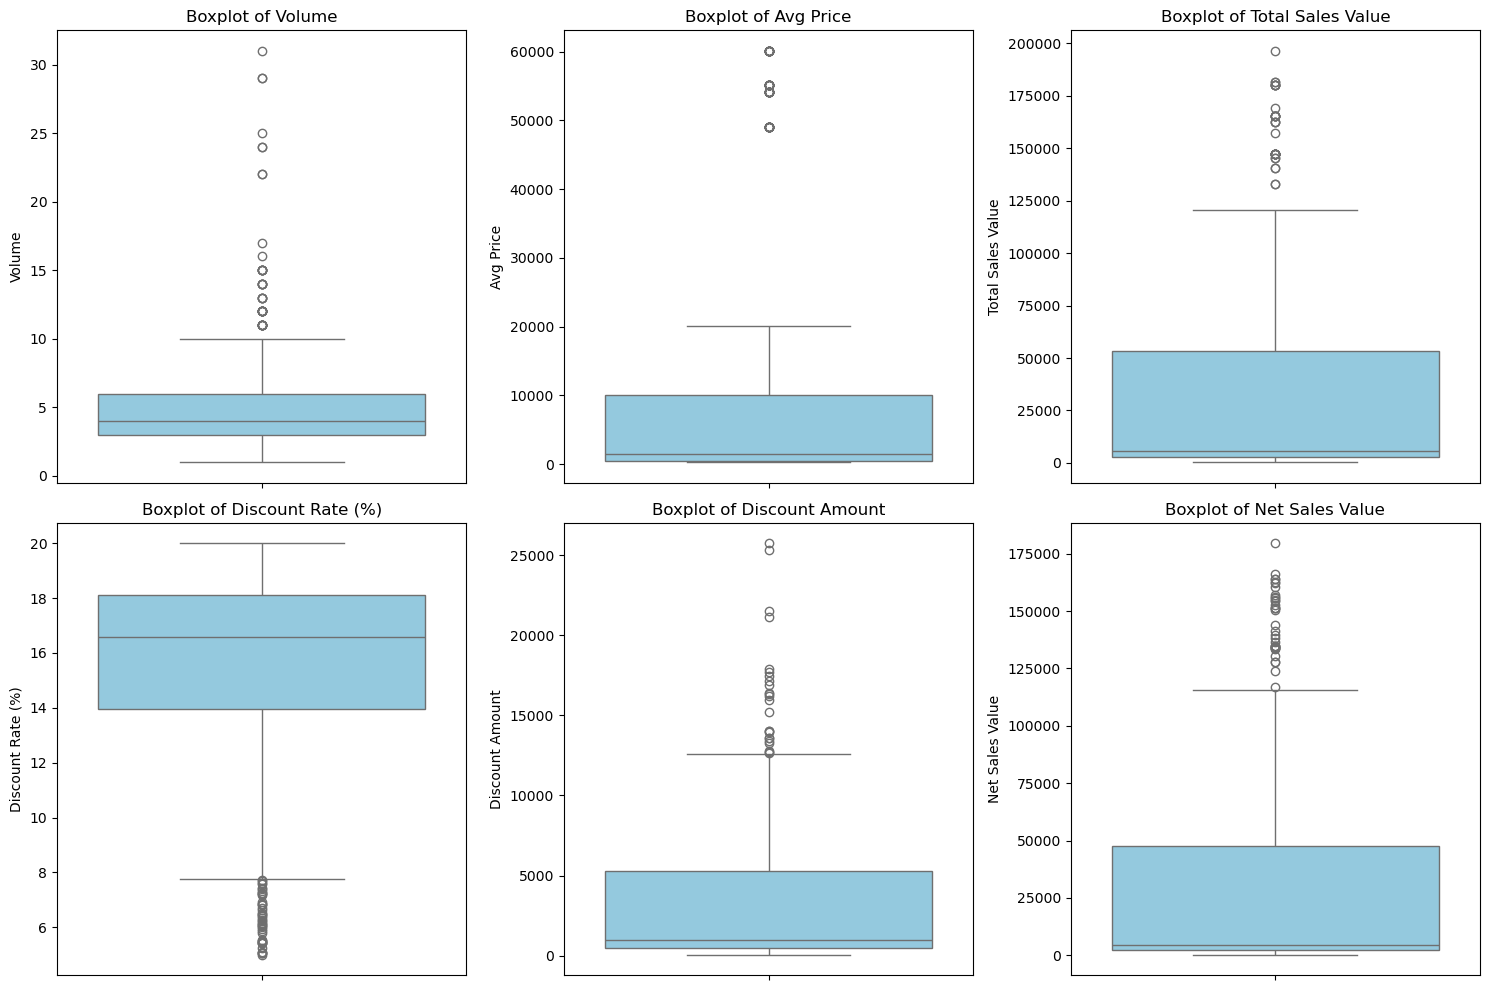

In [5]:

# Boxplots for each numerical variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Bar Chart Analysis for Categorical Columns

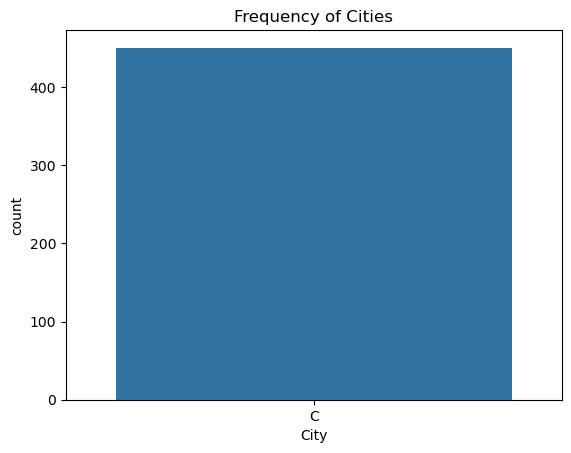

In [6]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Bar chart example for 'City'
sns.countplot(x='City', data=df)
plt.title('Frequency of Cities')
plt.show()


##  Standardization of Numerical Variables

In [7]:

# Standardization
standardized_data = (numerical_cols - numerical_cols.mean()) / numerical_cols.std()

# Before and after comparison
comparison = pd.DataFrame({
    'Original': df['Avg Price'],
    'Standardized': standardized_data['Avg Price']
}).head()
comparison


,Original,Standardized
0,12100,0.091072
1,10100,-0.019548
2,16100,0.312312
3,20100,0.533552
4,8100,-0.130168


##  Conversion of Categorical Data into Dummy Variables

In [8]:

# One-hot encoding
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display first few rows
encoded_df.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False



##  Conclusion
- Descriptive analytics revealed key metrics and patterns.
- Histograms and boxplots highlighted distribution and outliers.
- Standardization brought consistency in scales.
- One-hot encoding prepared categorical variables for machine learning models.
